In [4]:
# imports
import torch 
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
import os 
import cartopy
import cartopy.crs as ccrs
import numpy.ma as ma  
import h5py
import matplotlib.pyplot as plt
import csv

In [6]:
# loading smap data (H5 Files) and convert to csv
h5_file = h5py.File('C:/Users/HP/Desktop/rohith_smap/SMAP_L3_SM_P_E_20231003_R18290_001 (1).h5', 'r')

group_name = 'Metadata'  # typically the data is in following groups ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM', 'Soil_Moisture_Retrieval_Data_Polar_AM', 'Soil_Moisture_Retrieval_Data_Polar_PM']

# Access the group
group = h5_file[group_name]

# Define a directory to save the CSV files
output_dir = './meta/'  # Change this directory as needed
os.makedirs(output_dir, exist_ok=True)

# Iterate through the datasets within the group and save them as separate CSV files
for dataset_name, dataset in group.items():
    if isinstance(dataset, h5py.Dataset):
        data = dataset[:]
        output_csv_file = os.path.join(output_dir, f'{dataset_name}.csv')
        
        with open(output_csv_file, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(data)

print(f'Data from group {group_name} has been successfully converted to CSV files in {output_dir}.')


Data from group Metadata has been successfully converted to CSV files in ./meta/.


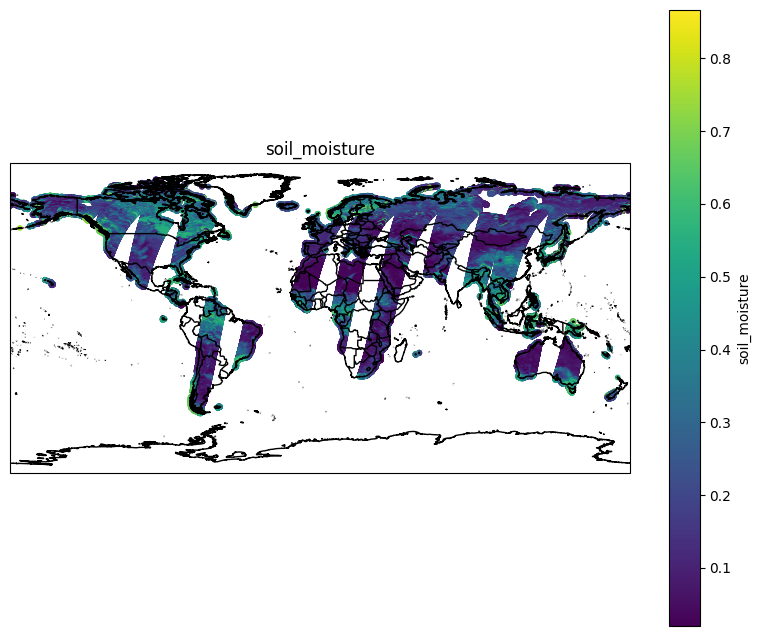

In [8]:
# PLOTING 

# Load latitude, longitude, and soil moisture CSV files into DataFrames without headers
latitude_df = pd.read_csv('C:/Users/HP/Desktop/rohith_smap/WIP/latitude.csv', header=None)
longitude_df = pd.read_csv('C:/Users/HP/Desktop/rohith_smap/WIP/longitude.csv', header=None)
soil_moisture_df = pd.read_csv('C:/Users/HP/Desktop/rohith_smap/WIP/soil_moisture.csv', header=None)

# Assuming your latitude and longitude columns are in the first and second columns respectively
latitude = latitude_df
longitude = longitude_df
soil_moisture = soil_moisture_df
# Create a masked array to ignore -9999 values
masked_soil_moisture = ma.masked_where(soil_moisture == -9999, soil_moisture)

# Create a Cartopy map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data using scatter, passing the masked array
scatter = ax.scatter(longitude, latitude, c=masked_soil_moisture, cmap='viridis', marker='o', s=10, transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(scatter, label='soil_moisture')

# Customize the map features, e.g., coastlines, boundaries
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=1)

# Add title and labels
plt.title('soil_moisture')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Show the plot
plt.show()

In [ ]:
# 
from libpysal import weights
from libpysal.explore import esda

# Load SMAP and TxSON data (replace with your data loading method)
# Example assuming SMAP and TxSON are DataFrames with 'latitude', 'longitude', and 'soil_moisture' columns

# Example data (replace this with your actual data)
smap_data = pd.DataFrame({
    'latitude': np.random.uniform(30, 35, 100),
    'longitude': np.random.uniform(-110, -100, 100),
    'soil_moisture': np.random.uniform(0, 1, 100)
})

txson_data = pd.DataFrame({
    'latitude': np.random.uniform(30, 35, 50),
    'longitude': np.random.uniform(-110, -100, 50),
    'soil_moisture': np.random.uniform(0, 1, 50)
})

# Assuming data is sorted by latitude and longitude for spatial analysis
smap_data = smap_data.sort_values(by=['latitude', 'longitude']).reset_index(drop=True)
txson_data = txson_data.sort_values(by=['latitude', 'longitude']).reset_index(drop=True)

# Spatial weights - using KNN (K-nearest neighbors) with k=5
smap_weights = weights.KNN.from_dataframe(smap_data, k=5)
txson_weights = weights.KNN.from_dataframe(txson_data, k=5)

# Moran's I for SMAP
moran_smap = esda.Moran(smap_data['soil_moisture'], smap_weights)
print(f"Moran's I for SMAP data: {moran_smap.I}")

# Moran's I for TxSON
moran_txson = esda.Moran(txson_data['soil_moisture'], txson_weights)
print(f"Moran's I for TxSON data: {moran_txson.I}")
